# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

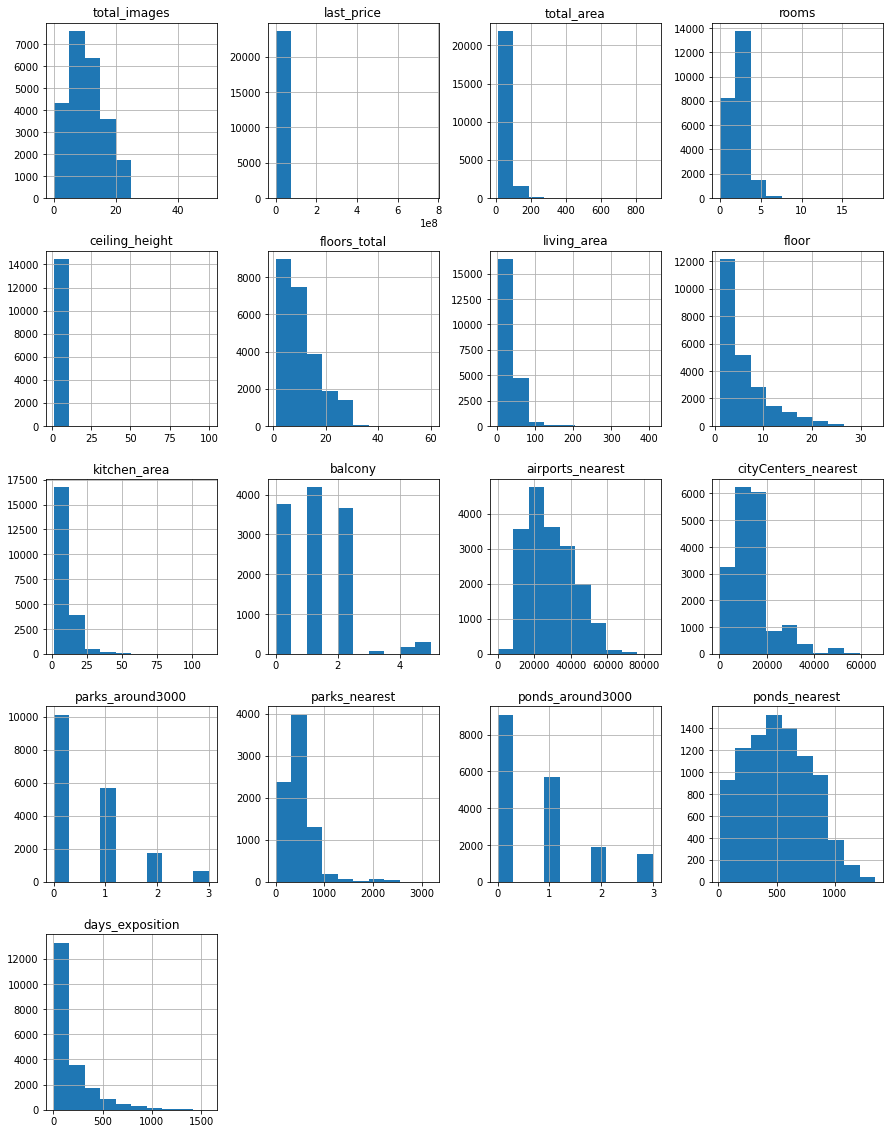

In [4]:
data.hist(figsize=(15,20));

Если посмотреть на таблицу, то можно увидеть довольно много прпоусков. Анализировать такую таблицу без заполнения пропусков нельзя. Также есть данные, которые нужно перевести в другой тип данных(например: floors_total, parks_around3000, ponds_around3000 в таблице представлены типом float, хотя должны быть представлены целым числом - int).  
На графиках смущает количество балконов, которые больше 4. Не является ли это выбросом? Также непонятно, какие значения есть в last_price, ceiling_height, total_area, living_area, kitchen_area. Такие столбцы на аномалии и выбросы надо изучить отдельно.

### Предобработка данных

**Исследование и заполнение пропусков в данных**

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в след. столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition 

Удаляем строки, где стоит пропуск в locality_name. Всего таких пропусков 49, что несильно скажется на дальнейшем исследовании.

In [6]:
data = data.dropna(subset=['locality_name']) 

Ставим на место пропусков в столбце balcony 0, так как, скорее всего, балконов в этих квартирах нет. 

In [7]:
data['balcony'] = data['balcony'].fillna(0)

/tmp/ipykernel_222/2234501656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].fillna(0)


In [8]:
#data['locality_name'].unique()

Делаем категоризацию по locality_name. Создаем новый столбец 'locality_type'.

In [9]:
def locality_type(locality_name):
    if 'деревня' in locality_name:
        return 'деревня'
    if 'поселок' in locality_name:
        return 'поселок'
    if 'село' in locality_name:
        return 'село'
    return 'город'

data['locality_type'] = data['locality_name'].apply(locality_type)

/tmp/ipykernel_222/700738305.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_type'] = data['locality_name'].apply(locality_type)


Делаем сводную таблицу по медиане floors_total. Пропуски заполняем медианами в зависимости от типа населенного пункта.

In [10]:
pv_t = data.pivot_table(index = 'locality_type', values = 'floors_total', aggfunc = ['median'])
pv_t.columns = ['floors_total']
pv_t

,floors_total
locality_type,
город,9.0
деревня,9.0
поселок,5.0
село,4.0


In [11]:
def func(row):
    if pd.isna(row['floors_total']):
        return pv_t.loc[row['locality_type']]
    return row['floors_total']

data['floors_total'] = data.apply(func, axis=1)

/tmp/ipykernel_222/202495336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] = data.apply(func, axis=1)


In [12]:
data['floors_total'].isna().sum()

0

In [13]:
'floor' > 'floors_total'

False

Заполняем пропуски ceiling_height медианой.

In [14]:
print(data['ceiling_height'].describe())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


/tmp/ipykernel_222/2742429864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


Пропуски в столбеце is_apartment заполняем булевым значением - False.

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(False)

/tmp/ipykernel_222/2052809825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_apartment'] = data['is_apartment'].fillna(False)


Пропуски в ponds_around3000, parks_around3000 заполним 0, так как рядом нет парков и прудов. Days_exposition также заполним пропусками, поскольку на данный показатель влияют все остальные столбцы(факторы), поэтому трудно найти какую-то медиану, которая смогла бы правдоподнобно заменить пропуски.

In [16]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

/tmp/ipykernel_222/3234033971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['parks_around3000'] = data['parks_around3000'].fillna(0)


Столбец 'days_exposition' трогать не будем, поскольку отсутствиее значения означает, что недвижимость еще не продали.

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest скорее всего связаны с тем, что находятся далеко от недвижимости, поэтому заполним такие пропуски значениями выше третьего квантиля. 

Пропуски в 'airports_nearest', 'parks_nearest', 'cityCenters_nearest', 'ponds_nearest' трогать не будем, покольку у квартир разное расстояние до объектов. Заполнять пропуски медианой или большим значением будет неправильно

Чтобы заполнить пропуски в living_area, найдем коэффициент living_ratio, который показывает среднее соотношение living_area к total_area. Пропуски заполним коэффициентом, умножанным на значение общей площади. 

In [17]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


С кухней проделаем такую же операцию.

In [18]:
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
locality_type               0
dtype: int64

**Изменение типа данных**

In [19]:
data = data.astype({'last_price': 'int', 'total_area': 'int', 'living_area': 'int', 'kitchen_area': 'int', 'balcony': 'int', 'floors_total': 'int', 'days_exposition': 'int', 'first_day_exposition': 'datetime64[ns]', 'ponds_around3000': 'int', 'parks_around3000': 'int'}, errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  int64         
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  int64         
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  int64         
 13  balcony         

Все, что было возможно, заменили на целое число. Вещественные числа оставили в ceiling_height, cityCenters_nearest, airports_nearest, parks_nearest, ponds_nearest. Все эти столбцы представляют собой расстояние, поэтому такие данные лучше не округлять, так как это может повлиять на исследование. first_day_exposition изменили на временной тип, чтобы в дальнешем можно было проводить с этим столбцом какие-то действия.

**Обработка неявных дубликатов**

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сначала привидем все locality_name к нижнему регистру. Затем все "ё" поменяем на "е", чтобы название типа населенного пункта было одинаковым. После, поселок городского типа меняем на поселок, чтобы избавиться от неявных дубликатов.

In [21]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  int64         
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  int64         
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  int64         
 13  balcony         

Обратим внимание, что после заполнения пропусков количество данных сократилось на 49, что не противоречит правилам.

**Обработка и удаление аномалий (редких значений)**

In [22]:
print(sorted(data['ceiling_height'].unique()))

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 10.3, 

В столбце ceiling_height есть потолки высотой 22 м - 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Умножим такие значения на 0.1. Затем построим ящик с усами, на котором видно, что выбросами считаются все значения выше 4,5 м. и ниже 2.

(0.0, 6.0)

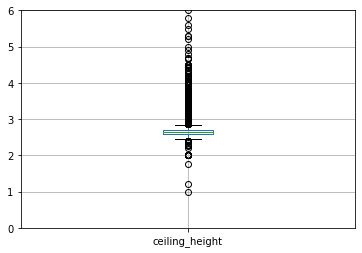

In [23]:
data.boxplot('ceiling_height')
plt.ylim(0, 6)

In [24]:
data.loc[(data['ceiling_height'] >= 22) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height'] * 0.1
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 4.5)]

In [25]:
data['balcony'].value_counts()

0    15209
1     4181
2     3653
5      302
4      182
3       81
Name: balcony, dtype: int64

Балконы трогать не будем. Достаточно много квартир с 4 или 5 балконами. 

(0.0, 900.0)

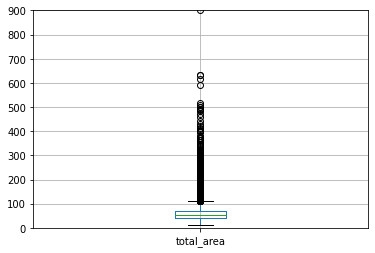

In [26]:
data.boxplot('total_area')
plt.ylim(0, data['total_area'].max())

Изучив информацию о площади студий, минимальная площадь может составлять 16 кв. м. Квартир меньше 16 кв. м. немного, так что можно убрать такие аномальные значения.

Также уменьшаем максимальную общую площадь до 510. На гистограмме видно, что таких значений очень мало.

In [27]:
data[data['total_area'] <= 16]['total_area'].count()

10

In [28]:
data = data[(data['total_area'] >= 16) & (data['total_area'] <= 510)]

С помощью функции describe() видно, что третий квантиль равен 3 комнат. На гистограмме также видна картина. Уберем строки, где комнат больше 6.

count    23593.000000
mean         2.067859
std          1.069760
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

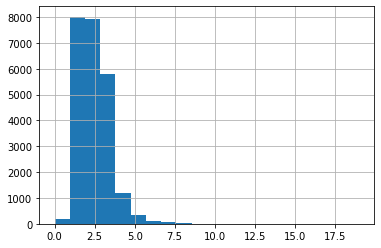

In [29]:
data['rooms'].hist(bins=20)
data['rooms'].describe()

In [30]:
data = data[data['rooms'] <= 6]

Основное отличие квартиры-студии от однокомнатной квартиры заключается в разграничении помещений. У любой однокомнатной квартиры есть отдельные кухня, жилая комната и санузел. Квартира-студия представляет собой одно большое помещение, которое включает в себя комнату, кухню, прихожую. Отдельным помещением остается только санузел. 
URL: https://xn--h1alcedd.xn--d1aqf.xn--p1ai/instructions/chto-takoe-kvartira-studiya/

Основываясь на данной информации, данные, где 0 комнат можно оставить. Но для более достоверной выборки надо проверить следующее:

In [31]:
data[(data['rooms'] == 0) & (data['studio'] == True)]['rooms'].count()

136

In [32]:
data[data['rooms'] == 0]['rooms'].count()

195

Видно, что в данных есть 157 объектов с 0 комнатами. Это могут быть только студии. А объектов, где 0 комнат и студия True, - 107. Удалим те квартиры из данных, где комнат ноль, и это не студия.

In [33]:
data.drop(data.loc[(data['rooms'] == 0) & (data['studio'] == False)].index, inplace=True, axis=0)

In [34]:
data[data['rooms'] == 0]['rooms'].count()

136

На нижнем графике видно, что все что выше 30 этажей является выбросами.

<AxesSubplot:>

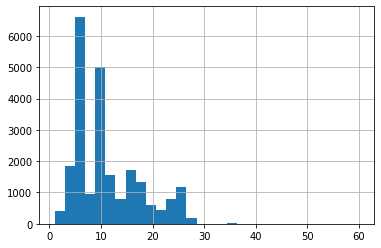

In [35]:
data['floors_total'].hist(bins=30)

In [36]:
data = data[data['floors_total'] <= 30]

Согласно СП 54.13330.2016, для однокомнатных квартир существуют минимальные требования по площади кухни в шесть квадратных метров. Кухни-ниши должны занимать не менее пяти «квадратов».

<AxesSubplot:>

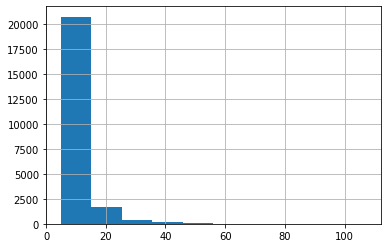

In [37]:
data = data[data['kitchen_area'] >= 5]
data['kitchen_area'].hist(bins=10)

Living_area отдельно мы не трогали, но мы сделаем следующую фильтрацию:

In [38]:
data = data[data['total_area'] > data['living_area'] + data['kitchen_area']]

В столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000, days_exposition сложно найти аномалии. Единственное, можно поработать с выбросами.

В столбце airports_nearest удалим из выборки значения меньше 10000, поскольку жилые дома не могут так близко распологаться к аэропорту.

<AxesSubplot:>

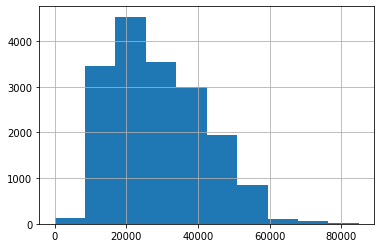

In [39]:
data['airports_nearest'].hist(bins=10)

In [40]:
data.drop(data.loc[data['airports_nearest'] < 10000].index, inplace=True, axis=0)

В cityCenters_nearest сложно найти аномальные значения. Трогать не будем.

<AxesSubplot:>

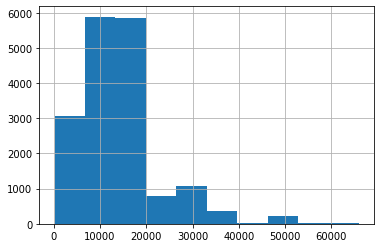

In [41]:
data['cityCenters_nearest'].hist(bins=10)

В parks_nearest, как минимум, должна быть дорога между парком и домом. От края проезжей части до линии жилой и общественной застройки не должно быть меньше 50 м. 

<AxesSubplot:>

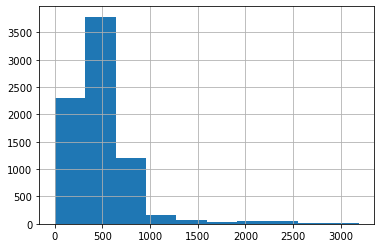

In [42]:
data['parks_nearest'].hist(bins=10)

In [43]:
data.drop(data.loc[data['parks_nearest'] < 100].index, inplace=True, axis=0)

В ponds_nearest та же история, как и с парками.

<AxesSubplot:>

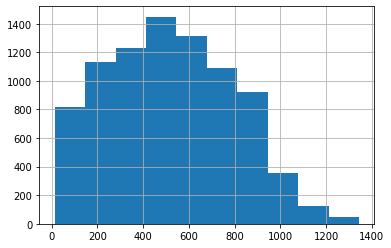

In [44]:
data['ponds_nearest'].hist(bins=10)

In [45]:
data.drop(data.loc[data['ponds_nearest'] < 100].index, inplace=True, axis=0)

На гистограммах по parks_around3000 и ponds_around3000 не выявить выбросы и аномалии.

<AxesSubplot:>

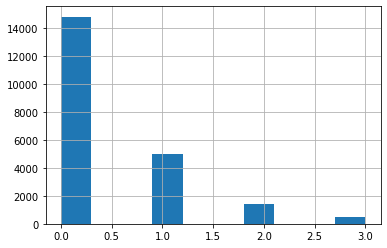

In [46]:
data['parks_around3000'].hist(bins=10)

<AxesSubplot:>

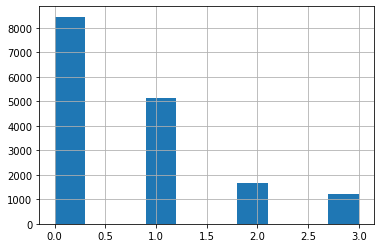

In [47]:
data['ponds_around3000'].hist(bins=10)

В days_exposition особых выбросов не найдено.

(0.0, 1580.0)

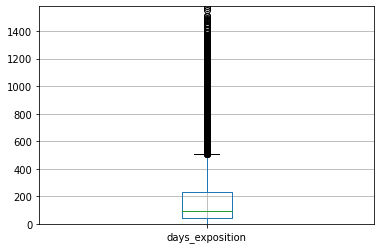

In [48]:
data.boxplot('days_exposition')
plt.ylim(0, data['days_exposition'].max())

В last_price выбросы начинаются с 70 млн. Также ограничили снизу цену: вряд ли квартиры стоят меньше 1 млн.

(0.0, 125000000.0)

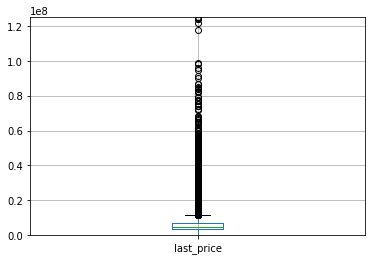

In [49]:
data.boxplot('last_price')
plt.ylim(0, 125000000)

In [50]:
data = data[(data['last_price'] <= 70000000) & (data['last_price'] > 1000000)]

In [51]:
data.shape[0] / 23699

0.9054812439343433

После предобработки удалилось 10% данных. В большинстве столбцов пропуски заполнили медианой. В столбцах с булевыми значениями пропуски заполнили значением False, так как если нет информации, то значит такого в недвижимости нет. Пропуски в столбцах с расстоянием заполнили большим значением, так как объекты находятся слишком далеко от недвижимости. После пропусков убрали аномальные значения, а также выбросы.

### Посчитайте и добавьте в таблицу новые столбцы

**Новый столбец: цена одного квадратного метра**

In [52]:
data['price_for_one_m'] = data['last_price'] / data['total_area']

**Новый столбец: день недели публикации объявления**

In [53]:
data['day'] = data['first_day_exposition'].dt.weekday

**Новый столбец: месяц публикации объявления**

In [54]:
data['month'] = data['first_day_exposition'].dt.month

**Новый столбец: год публикации объявления**

In [55]:
data['year'] = data['first_day_exposition'].dt.year

**Новый столбец: тип этажа квартиры**

In [56]:
def floor_type(floor):
        if floor['floor'] == 1:
            return 'первый'
        if floor['floor'] == floor['floors_total']:
            return 'последний'
        else:
            return 'другой'
        
data['floor_type'] = data.apply(floor_type, axis = 1)

Создали функцию для того, чтобы распределить этажи по категориям.

**Новый столбец: расстояние до центра города в километрах**

In [57]:
data['citycenters_nearest_km'] = (data['cityCenters_nearest'] * 0.001)
data = data.round({"citycenters_nearest_km": 0})

### Проведите исследовательский анализ данных

**Отдельные гисторграммы для параметров объектов**

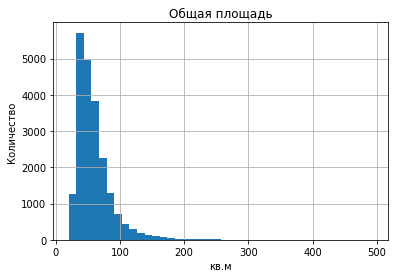

In [58]:
data['total_area'].hist(bins=40)
plt.title('Общая площадь')
plt.xlabel('кв.м')
plt.ylabel('Количество')
plt.show()

На данной диаграмме - распределение Пуассона. Пик - 40-50 кв. Это квартиры среднего класса.

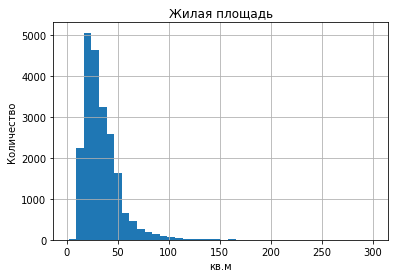

In [59]:
data['living_area'].hist(bins=40)
plt.title('Жилая площадь')
plt.xlabel('кв.м')
plt.ylabel('Количество')
plt.show()

На графике living_area тоже распределение Пуассона. Пик на living_area приходится на 16-25 кв. м. Прямо зависит от total_area.

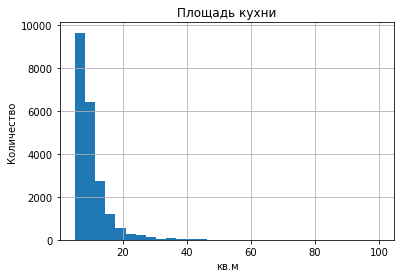

In [60]:
data['kitchen_area'].hist(bins=30)
plt.title('Площадь кухни')
plt.xlabel('кв.м')
plt.ylabel('Количество')
plt.show()

kitchen_area также прямо зависит от total_area. Распределение Пуассона. Пик 10-18 кв. м. Такое значение также считается средним для двухкомнатных, трехкомнатных квартир.

In [61]:
data['last_price'] = data['last_price'] / 1000000

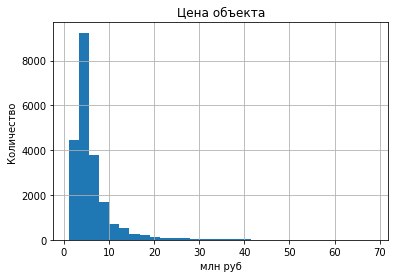

In [62]:
data['last_price'].hist(bins=30)
plt.title('Цена объекта')
plt.xlabel('млн руб')
plt.ylabel('Количество')
plt.show()

Распределение Пуассона. Пик приходится примерно на 5 млн. Такие не очень высокие цены для квартир, скорее всего, обусловлены средним классом, а также расположением.

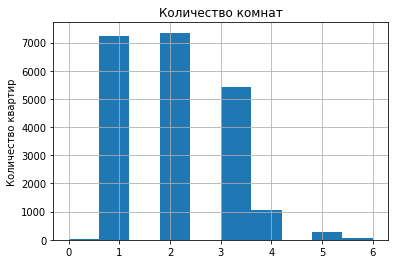

In [63]:
data['rooms'].hist(bins=10)
plt.title('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Распределение Пуассона. В большинстве квартир 1 или 2 комнаты, что логично.

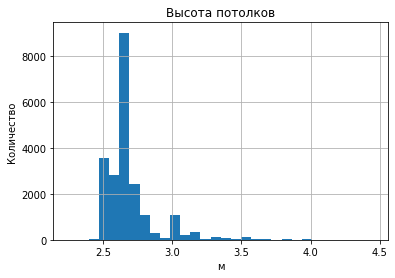

In [64]:
data['ceiling_height'].hist(bins=30)
plt.title('Высота потолков')
plt.xlabel('м')
plt.ylabel('Количество')
plt.show()

ceiling_height похож на что-то отдаленное от нормального распределения. Пик - 2.7 м.

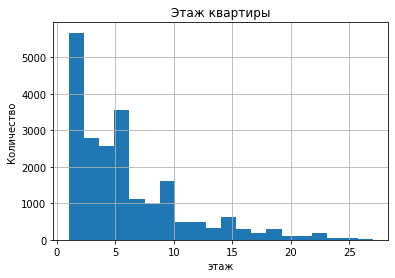

In [65]:
data['floor'].hist(bins=20)
plt.title('Этаж квартиры')
plt.xlabel('этаж')
plt.ylabel('Количество')
plt.show()

Распределение Пуассона, так как возможно преобладают дома с небольшим количеством этажей.

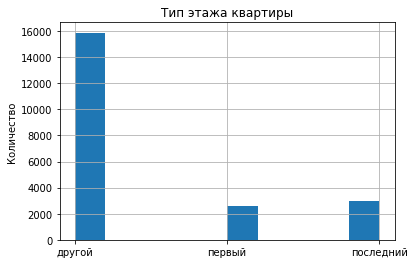

In [66]:
data['floor_type'].hist(bins=10)
plt.title('Тип этажа квартиры')
plt.ylabel('Количество')
plt.show()

По данному графику видно, что чаще всего предлагаются квартиры не на первом и не на последнем этаже.

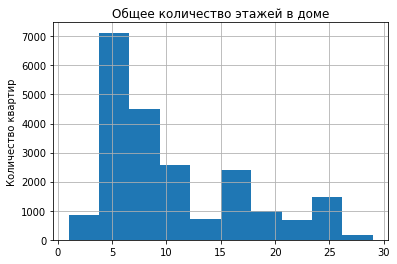

In [67]:
data['floors_total'].hist(bins=10)
plt.title('Общее количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

Возможно в Санкт-Петербурге и в соседних населённых пунктах преобладают 'пятиэтажки', поэтому так много предложений в них. Люди стараются переехать в новые жилые дома, поэтому продают квартиры в пятиэтажках.

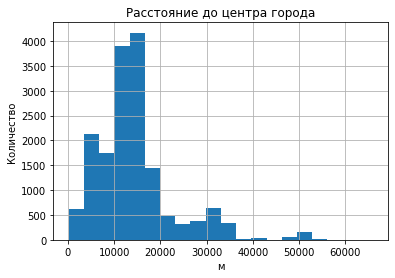

In [68]:
data['cityCenters_nearest'].hist(bins=20)
plt.title('Расстояние до центра города')
plt.xlabel('м')
plt.ylabel('Количество')
plt.show()

Большинство продаваемой недвижимости находится примерно в 11-18 км от ближайшего центра города.

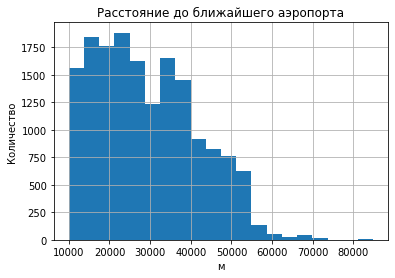

In [69]:
data['airports_nearest'].hist(bins=20)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('м')
plt.ylabel('Количество')
plt.show()

В airports_nearest было много пропусков. Из тех объявлений, где было отмечено расстояние, в основном, аэропорт находится в 15-35 км от жилья. Но таких значений немного.

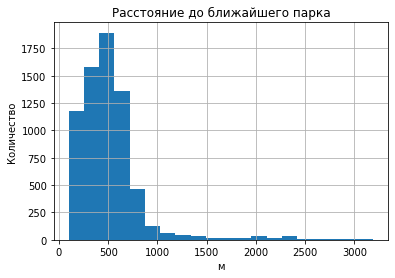

In [70]:
data['parks_nearest'].hist(bins=20)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('Количество')
plt.show()

В parks_nearest было много пропусков. Из тех объявлений, где было отмечено расстояние, расстояние равно около 500 м. Однако таких значений немного - около 1850. 

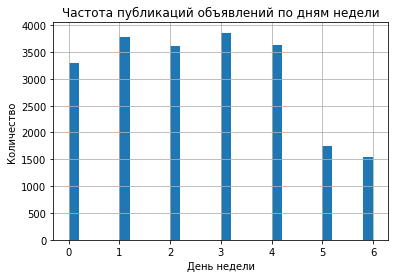

In [71]:
data['day'].hist(bins=30)
plt.title('Частота публикаций объявлений по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.show()

По столбцу 'day' можно понять, что люди предпочитают продавать недвижимость в начале недели, а не в пятницу или субботу, что логично)

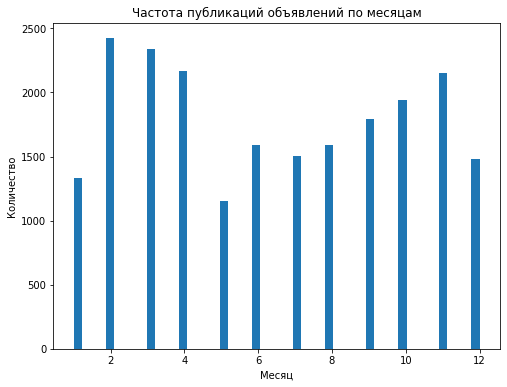

In [72]:
data['month'].plot(kind='hist', bins=50, figsize=(8, 6))
plt.title('Частота публикаций объявлений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.show()

На данном графике видно, что предложение выше всего в феврале и марте, ниже всего - в мае. После мая предложение снова растет. C чем это связно? Может стоит посмотреть на это с точки зрения праздничных дней. Так, в январе - новогодние праздники, в мае - 'майские праздники'. Также стоит отметить, что летом многие берут отпуск. Именно поэтому в январе и мае - низкие показатели. 

**Как быстро продавались квартиры (столбец days_exposition)?**

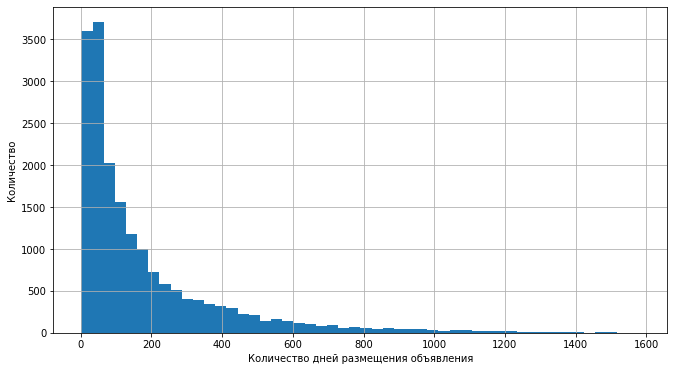

In [73]:
data['days_exposition'].hist(bins=50, figsize=(11,6))
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество')
plt.show()

In [74]:
data['days_exposition'].median()

96.0

In [75]:
data['days_exposition'].mean()

179.98482647296206

Посмотрев на график, можно увидеть, распределение Пуассона. Чаще всего объявление о продаже весит 100 и меньше дней. Об этом говорит и медиана(число в середине упорядоченного набора чисел) - 95 дней - обычно занимает продажа. Медиана более "устойчива" к выбросам, чем среднее арифмитическое, поэтому при анализе лучше опираться на нее. Соотвественно все, что меньше медианы, - быстрая продажа. Все, что больше, - долгая. А все значения выше среднего - необычно долгие продажи. 

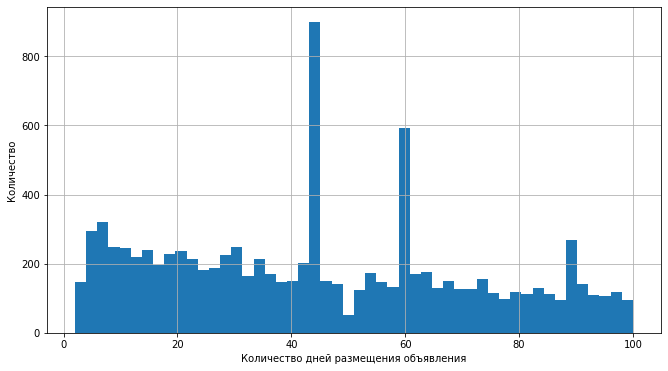

In [76]:
graphic = data.query('days_exposition <= 100')
graphic['days_exposition'].hist(bins=50, figsize=(11,6))
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Количество')
plt.show()

Если посмотреть на диапазон от 0 до 100 дней, то можно также увидеть пики - 45 и 60 дней.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

0.7645631399329735


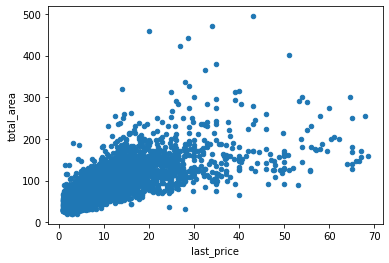

In [77]:
data.plot(x='last_price', y='total_area', kind='scatter')
print(data['last_price'].corr(data['total_area']))

0.6709789691093826


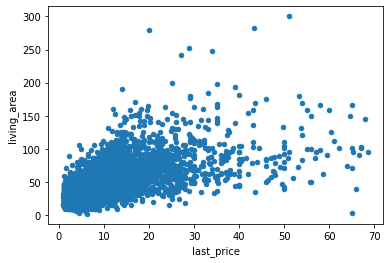

In [78]:
data.plot(x='last_price', y='living_area', kind='scatter')
print(data['last_price'].corr(data['living_area']))

Коэффициент корреляции равен 0,67. Связь между ценой и жилой площадью  - высокая. 

0.6075535529220454


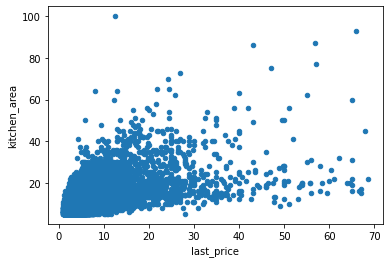

In [79]:
data.plot(x='last_price', y='kitchen_area', kind='scatter')
print(data['last_price'].corr(data['kitchen_area']))

Коэффициент корреляции равен 0,6. Связь между ценой и площадью кухни - выше среднего. 

0.46266706405803715


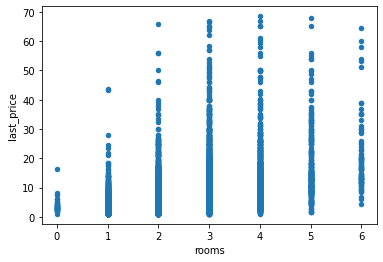

In [80]:
data.plot(x='rooms', y='last_price', kind='scatter')
print(data['last_price'].corr(data['rooms']))

Коэффициент корреляции равен 0,46. Связь между ценой и количеством комнат  - слабая. На графике видно, что стоимость возрастает с увеличением числа комнат. Однако таких недвижимостей немного.

-0.013370307526079714


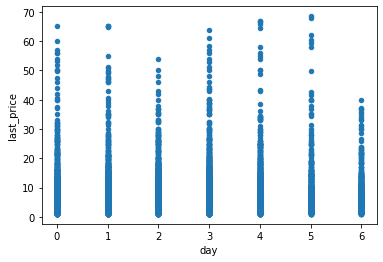

In [81]:
data.plot(x='day', y='last_price', kind='scatter')
print(data['last_price'].corr(data['day']))

0.0019293629036001014


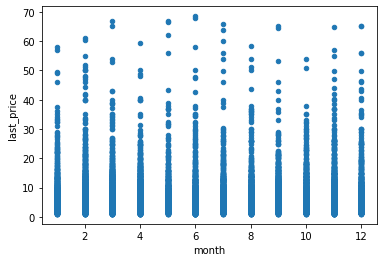

In [82]:
data.plot(x='month', y='last_price', kind='scatter')
print(data['last_price'].corr(data['month']))

-0.04853950890663034


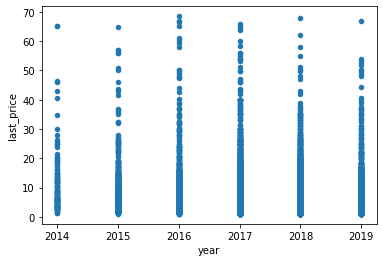

In [83]:
data.plot(x='year', y='last_price', kind='scatter')
print(data['last_price'].corr(data['year']))

Корреляция между годом, днем недели и ценой отрицательная. Связь между месяцем и ценой отсутствует. Коэффициент отрицательный - если рост одной величины связан с уменьшением другой. Нельзя сказать, что с годами снижается цена. Однако такую тенденцию можно проследить между 2016 и 2017, а также между 2018 и 2019. 

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

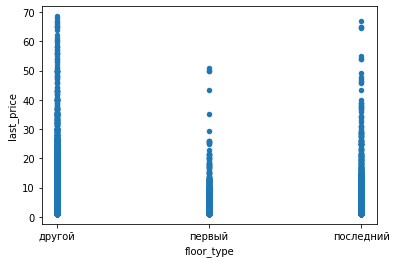

In [84]:
data.plot(x='floor_type', y='last_price', kind='scatter')

Здесь нельзя посчитать коэффициент корреляции, потому что у floor_type тип данных - str. По графику цена за первый этаж ниже остальных. За последний - немного выше. Однако стоимость недвижимоти за 'другой' этаж может быть гораздо выше. Определенная зависимость есть.

Таким образом, общая площадь, жилая площадь, площадь кухни сильно влияют на цену. Количество комнат несильно влияет на стоимость, а колиство дней размещения объявлений вообще не влияет. Стоимость скорее всего зависит от типа этажа.

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [85]:
data_pivot_2 = data.pivot_table(values='price_for_one_m', index='locality_name', aggfunc=['count', 'mean'])
data_pivot_2.columns=['count', 'mean']
data_pivot_2 = data_pivot_2.sort_values(by='count', ascending=False)
data_pivot_2.head(10)

,count,mean
locality_name,,
санкт-петербург,14182,112235.600996
поселок мурино,486,84855.541119
поселок шушары,419,78224.826413
всеволожск,383,69020.225742
пушкин,339,104122.755272
колпино,319,75374.405769
поселок парголово,317,90920.987888
гатчина,297,69215.303198
деревня кудрово,264,92421.376072


Самая высокая стоимость квадратного метра из топ 10 - в Санкт-Петербурге и в г. Пушкин, самая низкая - в Всеволожске и в Выборге.

**Средняя цена каждого километра до центра в квартирах в Санкт-Петербурге**

<AxesSubplot:xlabel='citycenters_nearest_km'>

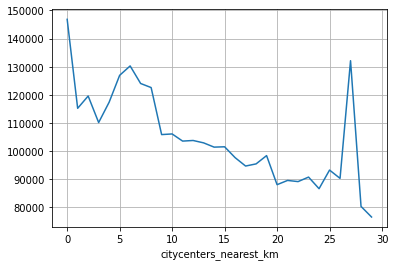

In [86]:
data_spb = data.query('locality_name == "санкт-петербург"').groupby('citycenters_nearest_km')['price_for_one_m'].median()
data_spb.plot(kind='line', y='citycenters_nearest_km', x='price_for_one_m', grid=True)

По графику видно, что после 5 км цены сильно падают, следовательно центр - это первые 6 км. 

Построим таблицу квартир, которые находятся в центре Санкт-Петербурга.

In [87]:
data_spb_center = data.query('locality_name == "санкт-петербург" and citycenters_nearest_km <= 6')
data_spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,price_for_one_m,day,month,year,floor_type,citycenters_nearest_km
24,8,6.50,97,2015-10-31,2,2.65,3,46,1,False,False,False,19,0,санкт-петербург,20052.0,2336.0,3,411.0,3.0,124.0,265.0,город,67010.309278,5,10,2015,первый,2.0
35,6,15.50,149,2017-06-26,5,2.65,5,104,4,False,False,False,17,0,санкт-петербург,23670.0,3502.0,0,NaN,1.0,779.0,644.0,город,104026.845638,0,6,2017,другой,4.0
61,18,7.99,74,2017-08-24,2,2.65,4,43,4,False,False,False,20,0,санкт-петербург,22568.0,4288.0,1,363.0,0.0,NaN,609.0,город,107972.972973,3,8,2017,последний,4.0
63,2,20.00,118,2018-09-11,3,3.00,9,68,7,False,False,False,16,0,санкт-петербург,26055.0,4800.0,1,648.0,1.0,779.0,37.0,город,169491.525424,1,9,2018,другой,5.0
99,32,9.60,90,2017-09-26,4,2.65,5,67,2,False,False,False,8,0,санкт-петербург,23277.0,2818.0,0,NaN,0.0,NaN,104.0,город,106666.666667,1,9,2017,другой,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9.00,110,2015-12-10,4,3.36,7,64,5,False,False,False,15,0,санкт-петербург,26313.0,5016.0,3,417.0,1.0,118.0,816.0,город,81818.181818,3,12,2015,другой,5.0
23665,11,4.25,47,2016-05-20,1,2.65,6,18,1,False,False,False,14,0,санкт-петербург,20503.0,4946.0,2,624.0,1.0,519.0,131.0,город,90425.531915,4,5,2016,первый,5.0
23690,3,5.50,52,2018-07-19,2,2.65,5,31,2,False,False,False,6,0,санкт-петербург,20151.0,6263.0,1,300.0,0.0,NaN,15.0,город,105769.230769,3,7,2018,другой,6.0
23691,11,9.47,72,2016-10-13,2,2.75,25,40,7,False,False,False,10,1,санкт-петербург,19424.0,4489.0,0,NaN,1.0,806.0,519.0,город,131527.777778,3,10,2016,другой,4.0


### Общий вывод

Для исследования рынка объявлений по продаже недвижимости были сделаны следующие этапы:
- Заполнение пропусков логичными значениями
- Изменение типа данных
- Исследование столбцов на наличие аномалий
- Удаление аномалий
- Удаление выбросов(с использованием "ящика с усами", столбчатой гистограммы)
- Добавление новых столбцов в таблицу для удобства дальнейшего исследования
- Изучение зависимости  общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год) на цену недвижимости
- Подсчет средних цен за 1 кв. м. в списке топ-10 населенных пунктов и средних цен каждого километра до центра в квартирах в Санкт-Петербурге

Для того, чтобы провести исследование и изучить влияние одного показателя на другой, надо произвести предобработку данных, чтобы исследование было максимально достоверным. Этот этап включает в себя 1-5 пункты проекта. 

После, были описаны показатели с помощью гистограмм(предположения о том, почему то или иное значение показателя растет или падает; почему пик показателя именно такое). Это дало представление о том, какие данные собраны в этом проекте. 
- Средняя общая площадь квартиры - 50-60 кв.м.
- Средняя цена - 5 млн. Такие не очень высокие цены для квартир, скорее всего, обусловлены средним классом, поскольку после исследования столбца floors_total было обноружено много пятиэтажек в данных
- Средняя высота потолков - 2,7 м
- Преобладают квартиры с 1 или 2 комнатами
- Не так много квартир имеют в шаговой доступности парк или пруд
- Из тех объявлений, где было отмечено расстояние до аэропорта, в основном, аэропорт находится в 15-35 км от жилья. Но таких значений немного
- Чаще всего квартиры продаются в первые 100 дней после вывешивания объявления

В ходе изучения зависимости показателей выяснилось, что на цену недвижимости больше всего влияют площади квартиры: общая, жилая, кухня. Также на цену влияет расстояние до центра города. Меньше влияет количество комнат в квартире, а также этаж, на котором находится квартира. Была также посчитана средняя цена одного кв. м. в 10 самых популярных населенных пунктов по количеству объявлений. Самая высокая стоимость квадратного метра из топ 10 - в Санкт-Петербурге и в г. Пушкин, самая низкая - в Всеволожске и в Выборге. Также было выявлено, что центр города заканчивается после 6 км, после этого цены на квартиру становятся меньше.